In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Load Excel File

df = pd.read_excel("AACS China Consolidate - 2025.xlsx")

# Drop unwanted columns
ignore_cols = [
    "Authentix Recommendation", "Insturction received by client", "Client feedback",
    "Seller cluster no.", "My Remarks", "TP Status", "Validated(yes/No)", "Case Status",
    "Assessment", "Client Remarks", "Reports", "Listing Risk Category", "-",
    "Complaint no.", "Rejected", "Complaint file (Yes / No)",
    "Complaint Year", "Complaint Month", "Complaint Date", "Remove Date"
]

complaint_cols = [col for col in df.columns if 'complaint' in col.lower()]
all_ignore = list(set(ignore_cols + complaint_cols))

df = df.drop(columns=all_ignore, errors='ignore')

# Preview cleaned data
df.head()

,Batch,Month,Case Reference Number,Seller Name (native langauge),Seller name (English),Shop Name (native langauge),Shop name (English),Seller ID,Seller Type,Business Type,...,Assement,Listing Risk,Listing Risk - 1,Remarks,Year,Month.1,Liquor / Caps / Bottles,Active/Inactive,Main Country,Seller Category
0,January,January,CN-DG-20250128-01,-,"Xuzhou Huiou Glass Products Co., Ltd.",-,-,huiouboli,Entity,Manufacturer,...,-,High,-,Unauthorised use of brand name,2025,January,Empty Bottle,Active,China,High
1,January,January,CN-DG-20250128-02,-,"Shandong United Mebong Imp.&exp. Co.,",-,-,sdunited,Entity,Trading,...,-,High,-,Unauthorised use of brand name,2025,January,Empty Bottle,Active,China,High
2,January,January,CN-DG-20250128-03,-,"Xilong Products Co., Limited",-,-,xilongglassbottle,Entity,Trading,...,-,High,-,Unauthorised use of brand name,2025,January,Empty Bottle,Active,China,High
3,January,January,CN-DG-20250128-03,-,"Xilong Products Co., Limited",-,-,xilongglassbottle,Entity,Trading,...,-,High,-,Unauthorised use of brand name,2025,January,Empty Bottle,Active,China,High
4,January,January,CN-DG-20250128-03,-,"Xilong Products Co., Limited",-,-,xilongglassbottle,Entity,Trading,...,-,High,-,Unauthorised use of brand name,2025,January,Empty Bottle,Active,China,High


In [ ]:
print(df.columns.tolist())

['Batch', 'Month', 'Case Reference Number', 'Seller Name (native langauge)', 'Seller name (English)', 'Shop Name (native langauge)', 'Shop name (English)', 'Seller ID', 'Seller Type', 'Business Type', 'Store Established', 'Seller region', 'Seller country', 'Seller province', 'Seller city', 'Address', 'WangWang Name', 'Phone number', 'Email ID', 'WeChat ID', 'Store Link', 'Seller Rating/ Reach', 'Platform Group', 'Platform type', 'Platform', 'Platform country', 'Brand House', 'Brand Name', 'Product', 'Product category', 'Product Offered as Combo', 'Currency', 'Price offered', 'Price offered (USD)', 'Assumed retail price (USD)', 'Discount offered (%)', 'Volume (ml)', 'Item number', 'Listing URL', 'Listing title', 'No. of infringing listings', 'Advertised inventory', 'Past sales/year ', 'Monthly Revenue', 'Image URL', 'Advertising on (Page/Group)', 'Group (Public/Private)', 'Name of the page/group', 'Admin(s) of the group [List, comma separated]', 'High risk Keywords', 'Seller confirmed t

In [ ]:
df.isnull().sum()

,0
Batch,0
Month,0
Case Reference Number,0
Seller Name (native langauge),0
Seller name (English),0
...,...
Month.1,0
Liquor / Caps / Bottles,0
Active/Inactive,0
Main Country,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 76 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Batch                                          1882 non-null   object
 1   Month                                          1882 non-null   object
 2   Case Reference Number                          1882 non-null   object
 3   Seller Name (native langauge)                  1882 non-null   object
 4   Seller name (English)                          1882 non-null   object
 5   Shop Name (native langauge)                    1882 non-null   object
 6   Shop name (English)                            1882 non-null   object
 7   Seller ID                                      1882 non-null   object
 8   Seller Type                                    1882 non-null   object
 9   Business Type                                  1882 non-null   

In [ ]:
df.describe()

,Year
count,1882.000000
mean,2024.881509
std,0.323274
min,2024.000000
25%,2025.000000
50%,2025.000000
75%,2025.000000
max,2025.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1882.0,2024.881509,0.323274,2024.0,2025.0,2025.0,2025.0,2025.0


In [ ]:
df.nunique()

,0
Batch,17
Month,4
Case Reference Number,385
Seller Name (native langauge),259
Seller name (English),385
...,...
Month.1,5
Liquor / Caps / Bottles,4
Active/Inactive,2
Main Country,1


<ipython-input-49-170ef939f7fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Risk Category', palette='viridis')


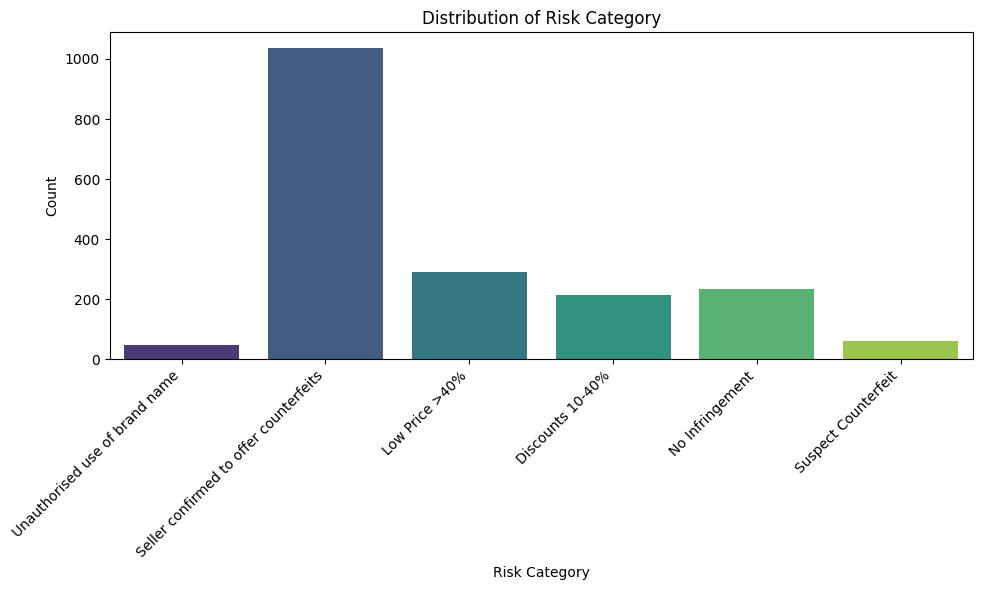

In [ ]:
# prompt: what should be the bar chart for this data forn risk category

# Visualize the distribution of the target variable ('Risk Category')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Risk Category', palette='viridis')
plt.title('Distribution of Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df['Remarks'].value_counts()

,count
Remarks,
recycled bottle & imitation cap,407
Low Price >40%,288
recycled bottle,270
No Infringement,231
Discounts 10-40%,211
recycled bottle & original cap,83
Suspect Counterfeit,60
open mould,49
Unauthorised use of brand name,33


In [ ]:
df['Listing Risk'].value_counts()

,count
Listing Risk,
High,1434
Low,234
Medium,214


<ipython-input-57-6bc51dc52cf3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Remarks', data = df, palette = 'hls')


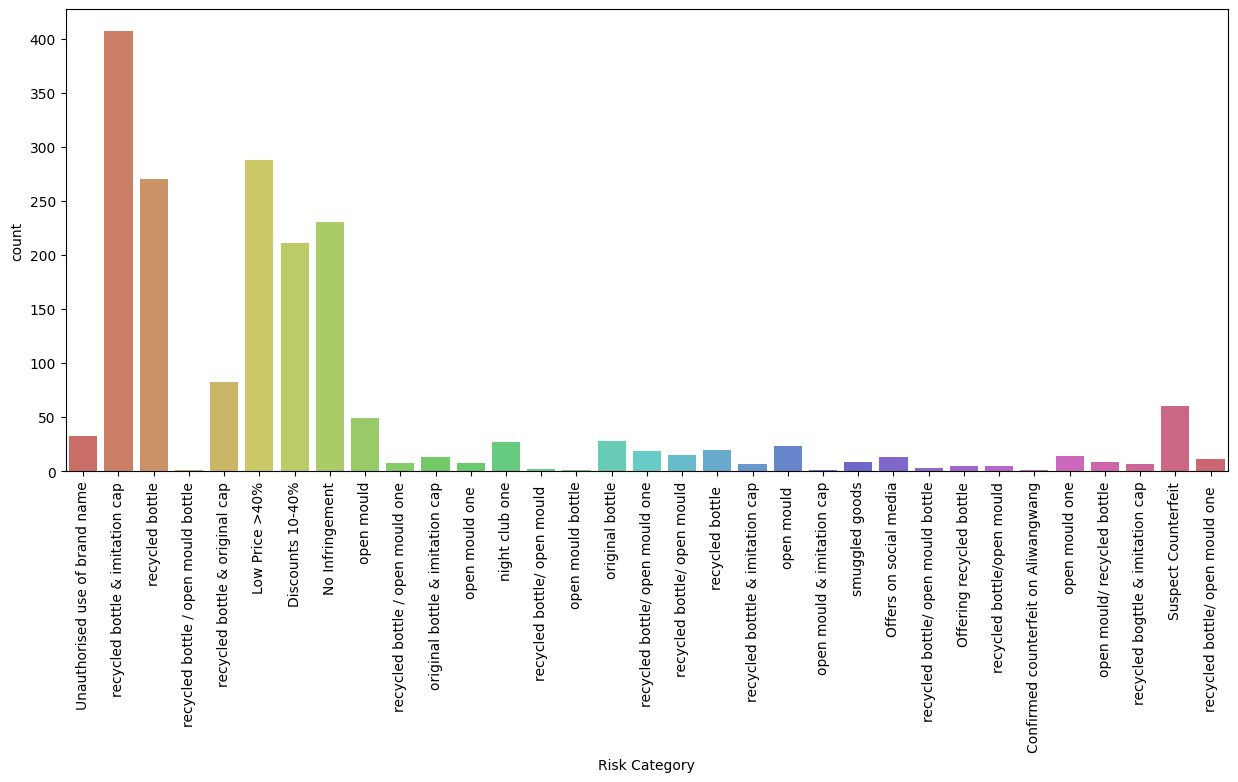

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Remarks', data = df, palette = 'hls')
plt.xlabel('Risk Category')
plt.xticks(rotation = 90)
plt.show()

<ipython-input-58-0631c0199c16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Listing Risk', data = df, palette = 'hls')


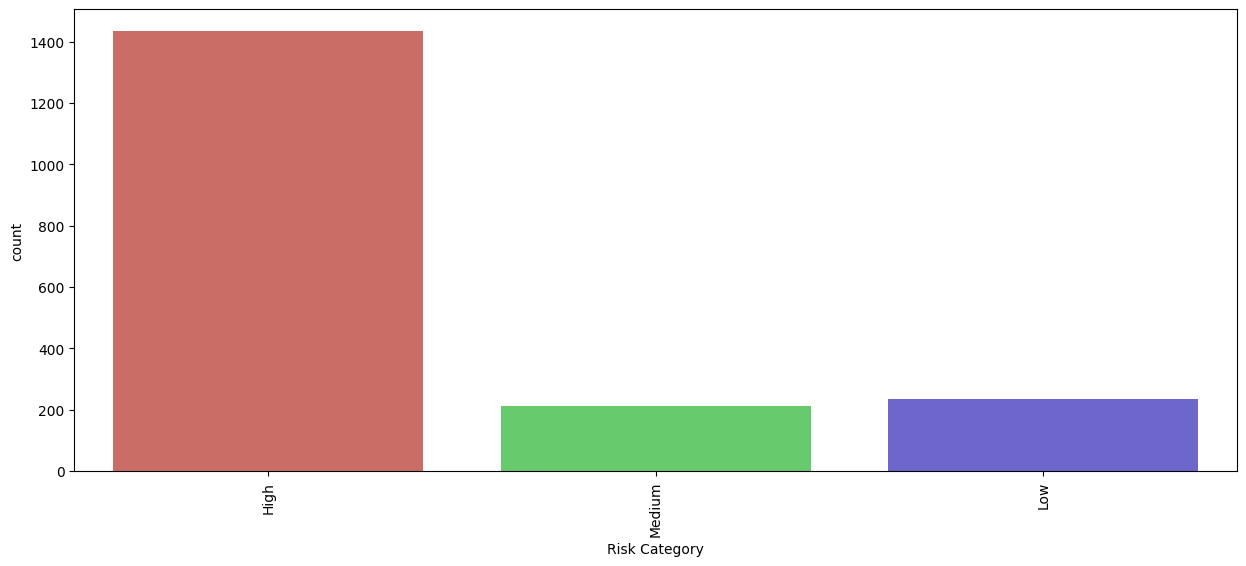

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Listing Risk', data = df, palette = 'hls')
plt.xlabel('Risk Category')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# ✅ Select relevant columns
project1_cols = [
    'Monthly Revenue',
    'Volume (ml)',
    'Price offered (USD)',
    'Discount offered (%)',
    'Past sales/year ',
    'Advertised inventory',
    'Product Offered as Combo',
    'Assumed retail price (USD)',
    'Risk Category',
    'Seller confirmed to offer counterfeits'
]

In [ ]:
# Select the columns first
df1 = df[project1_cols].copy()

In [ ]:
# ✅ Explicitly replace '-' with NaN before conversion
# This ensures that the problematic string '-' is treated as a missing value.
# Iterate through all columns expected to be numeric and replace '-'
numeric_cols_to_clean = [col for col in project1_cols if col not in ['Product Offered as Combo', 'Risk Category', 'Seller confirmed to offer counterfeits']]

for col in numeric_cols_to_clean:
    # Ensure the column is treated as string before replacement to avoid errors
    # if it's already numeric-like but has '-' strings.
    df1[col] = df1[col].astype(str).replace('-', np.nan)

In [ ]:
# ✅ Convert relevant columns to numeric, coercing errors to NaN
# Now that '-' is replaced with NaN, pd.to_numeric should work correctly for other issues.
for col in numeric_cols_to_clean:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

In [ ]:
# ✅ Check for NaNs before dropping
print("\nNaN counts per column before dropping:")
print(df1.isnull().sum())


NaN counts per column before dropping:
Monthly Revenue                           1535
Volume (ml)                                  1
Price offered (USD)                        206
Discount offered (%)                       458
Past sales/year                           1434
Advertised inventory                      1603
Product Offered as Combo                     0
Assumed retail price (USD)                 242
Risk Category                                0
Seller confirmed to offer counterfeits       0
dtype: int64


In [ ]:
# ✅ Drop rows with NaN values (which now include the explicitly replaced '-' and other coerced NaNs)
df1 = df1.dropna()

In [ ]:
# ✅ Check the size of the DataFrame after dropping NaNs
print(f"\nShape of df1 after dropping NaNs: {df1.shape}")


Shape of df1 after dropping NaNs: (108, 10)


In [ ]:
# ✅ Verify data types of columns in df1 before splitting
print("\nData types of df1 columns after cleaning:")
print(df1.dtypes)



Data types of df1 columns after cleaning:
Monthly Revenue                           float64
Volume (ml)                               float64
Price offered (USD)                       float64
Discount offered (%)                      float64
Past sales/year                           float64
Advertised inventory                      float64
Product Offered as Combo                   object
Assumed retail price (USD)                float64
Risk Category                              object
Seller confirmed to offer counterfeits     object
dtype: object


In [ ]:
# Check if df1 is empty before proceeding
if df1.empty:
    print("Error: df1 is empty after dropping NaNs. Cannot proceed with train_test_split.")
else:
    # ✅ Encode categorical columns
    le = LabelEncoder()
    # Ensure columns are strings before encoding to handle potential mix of types
    df1['Product Offered as Combo'] = le.fit_transform(df1['Product Offered as Combo'].astype(str))
    # The target variable 'Risk Category' is also encoded. Ensure it's string first.
    df1['Risk Category'] = le.fit_transform(df1['Risk Category'].astype(str))
    # Also encode 'Seller confirmed to offer counterfeits' if it's not already numeric
    if 'Seller confirmed to offer counterfeits' in df1.columns and df1['Seller confirmed to offer counterfeits'].dtype == 'object':
         df1['Seller confirmed to offer counterfeits'] = le.fit_transform(df1['Seller confirmed to offer counterfeits'].astype(str))


In [ ]:
# Check if df1 is empty before proceeding
if df1.empty:
    print("Error: df1 is empty after dropping NaNs. Cannot proceed with train_test_split.")
else:
    # ✅ Encode categorical columns
    le = LabelEncoder()
    # Ensure columns are strings before encoding to handle potential mix of types
    df1['Product Offered as Combo'] = le.fit_transform(df1['Product Offered as Combo'].astype(str))
    # The target variable 'Risk Category' is also encoded. Ensure it's string first.
    df1['Risk Category'] = le.fit_transform(df1['Risk Category'].astype(str))
    # Also encode 'Seller confirmed to offer counterfeits' if it's not already numeric
    if 'Seller confirmed to offer counterfeits' in df1.columns and df1['Seller confirmed to offer counterfeits'].dtype == 'object':
         df1['Seller confirmed to offer counterfeits'] = le.fit_transform(df1['Seller confirmed to offer counterfeits'].astype(str))

    # ✅ Split into features and target
    # Ensure 'Seller confirmed to offer counterfeits' is included in X if it's now numeric
    if 'Seller confirmed to offer counterfeits' in df1.columns and df1['Seller confirmed to offer counterfeits'].dtype != 'object':
        # Check if the column is still in df1 after dropna
         if 'Seller confirmed to offer counterfeits' in df1.columns:
            X = df1.drop('Risk Category', axis=1)
            y = df1['Risk Category']
         else:
             # If 'Seller confirmed to offer counterfeits' was dropped due to NaNs
             # make sure to drop it from project1_cols or handle its absence.
             # For now, we assume it might be in X if it survived dropna and is numeric
             X = df1.drop('Risk Category', axis=1)
             y = df1['Risk Category']
    else:
        # If 'Seller confirmed to offer counterfeits' was not processed as numeric or dropped,
        # ensure X only contains the expected numeric/encoded columns.
         X_cols_for_model = [col for col in df1.columns if col != 'Risk Category']
         X = df1[X_cols_for_model]
         y = df1['Risk Category']

    # Ensure X contains only numeric types before scaling
    print("\nData types of X columns before scaling:")
    print(X.dtypes)

    # Assert that all columns in X are numeric types recognized by scikit-learn
    for col_dtype in X.dtypes:
        if not pd.api.types.is_numeric_dtype(col_dtype):
            print(f"Warning: Column '{X.columns[X.dtypes == col_dtype][0]}' is not numeric ({col_dtype}) before scaling.")

    # ✅ Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Data types of X columns before scaling:
Monthly Revenue                           float64
Volume (ml)                               float64
Price offered (USD)                       float64
Discount offered (%)                      float64
Past sales/year                           float64
Advertised inventory                      float64
Product Offered as Combo                    int64
Assumed retail price (USD)                float64
Seller confirmed to offer counterfeits      int64
dtype: object


In [ ]:
 # ✅ Train-test split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# ✅ Feature Scaling
scaler = StandardScaler()
# This is where the error occurred. With cleaner data in X_train, it should pass.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# ✅ Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
# ✅ Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 8  0  0]
 [ 0 11  0]
 [ 0  0  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         3

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [ ]:
# ✅ Plot feature importance
# Ensure X.columns matches the scaled features for the plot labels
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)


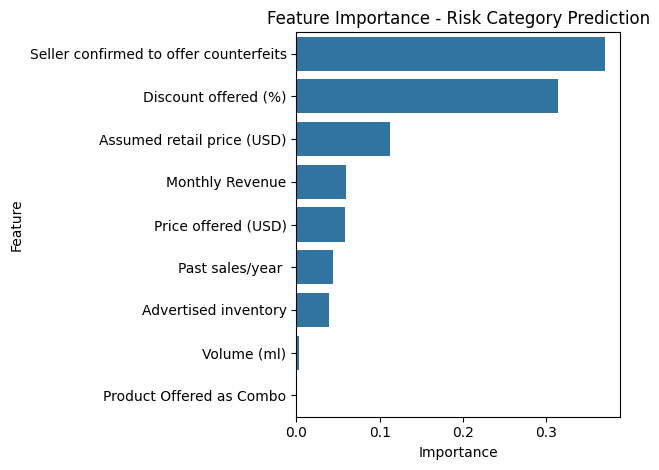

In [ ]:
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title('Feature Importance - Risk Category Prediction')
plt.tight_layout()
plt.show()